# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile as zipfile

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
df_states = pd.read_csv("../your-code/Temp_States.csv")
df_states


,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Print `temp`

In [3]:
print(df_states.Temperature)

0    19.444444
1     9.444444
2     3.333333
3    17.222222
4    14.444444
5    22.222222
6    20.000000
Name: Temperature, dtype: float64


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
df_states.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
df_ny = df_states.query('State == "New York"')
df_ny



,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
avg_ny = df_ny.Temperature.mean()
avg_ny

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
df_over_15 = df_states.query("Temperature > 15")
df_over_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
df_over_15["City"]

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
condition = "Temperature > 15 and Temperature < 20"
df_cities_range = df_states.query(condition)
df_cities_range

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
df_state_agg = df_states.groupby('State')['Temperature'].agg(['mean', 'std']).reset_index()
df_state_agg


,State,mean,std
0,Connecticut,15.833333,1.964186
1,New Jersey,21.111111,1.571348
2,New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
df_employee=pd.read_csv("../your-code/Employee.csv")


#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
df_employee.info()

'''
There are any nulls in df. There are two numeric (int) columns and rest are object.

'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 636.0+ bytes


'\nThere are any nulls in df. There are two numeric (int) columns and rest are object.\n\n'

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

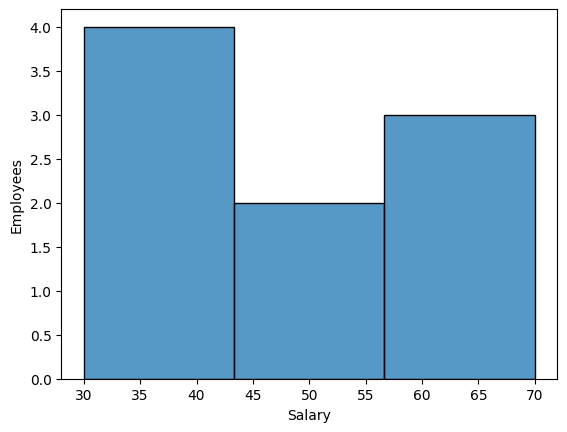

"\nEmployees in this company have been working for 1 to 3 years, so it means that company has been refreshed. \n\nIt's not a new company as some employees have been there for more than 7 years.\n\n"

In [135]:
sns.histplot(df_employee, x="Salary",bins=3)
plt.ylabel('Employees')
plt.show()

'''
Mainly salaries are in  range of 30k to 40k, but there are some employees between 55k and 70k 

there is a match between working years anb salary amount
'''


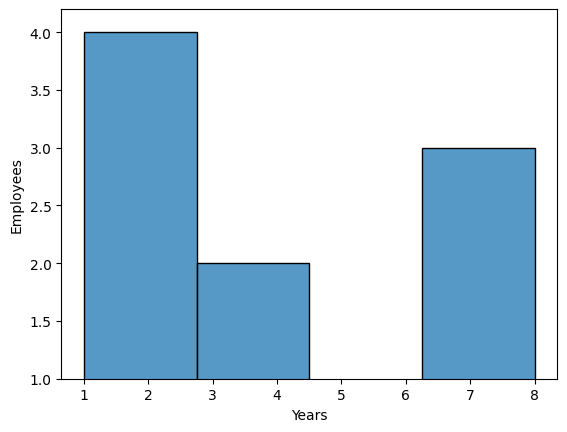

''

In [132]:
sns.histplot(df_employee, x="Years",bins=4)
plt.ylabel('Employees')
plt.ylim(1)
plt.show()

'''
Employees in this company have been working for 1 to 3 years, so it means that company has been refreshed. 

It's not a new company as some employees have been there for more than 7 years.

'''

#### What's the average salary in this company?

In [14]:
c_avg = df_employee.Salary.mean()
c_avg

48.888888888888886

#### What's the highest salary?

In [15]:
max_salary = df_employee.Salary.max()
max_salary

70

#### What's the lowest salary?

In [16]:
min_salary = df_employee.Salary.min()
min_salary

30

#### Who are the employees with the lowest salary?

In [17]:
df_lowest = df_employee.query("Salary == @min_salary")
df_lowest

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [18]:
df_david = df_employee.query("Name == 'David'")
df_david


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [19]:
df_employee.query("Name == 'David'").Salary

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [20]:
df_employee.query("Title == 'associate'")

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [21]:
df_employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [22]:
df_employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [23]:
df_employee.query("Title == 'associate' & Salary > 55")

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [24]:
df_employee.groupby('Years').Salary.mean()


Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [25]:
df_employee.groupby('Title').Salary.mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

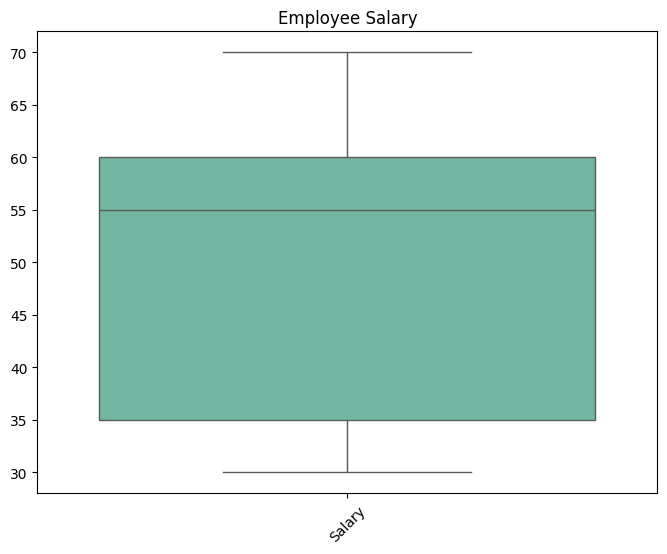

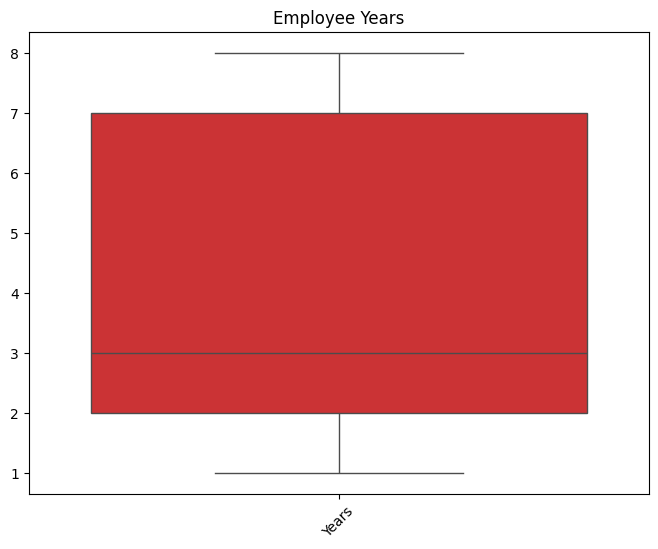

In [146]:
# lo deje asi al final el de quartiles: 
num_columns = ["Salary"]
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_employee[num_columns], palette='Set2')
plt.title('Employee Salary')
plt.xticks(rotation=45)
plt.show()

num_columns = ["Years"]
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_employee[num_columns], palette='Set1')
plt.title('Employee Years')
plt.xticks(rotation=45)
plt.show()

quartiles = df_employee[num_columns].quantile([0.25, 0.75])


In [ ]:
'''


- Most of salaries are below 55K and bounds are 30K and 80K. There are not any outlier.

- Most of employees were hiring between 1 and 3 years ago , but specially between 2 and 3 years ago. Rest of employees have been working between 3 and 7 years.
There is not outliers in this case.
'''

In [27]:
# print first quartile here

In [28]:
# print third quartile here

#### Is the mean salary per gender different?

In [29]:
# Yes, Gender salary is higher

df_employee.groupby('Gender').Salary.mean()

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [141]:
for col_name in df_employee.select_dtypes(include=['int64', 'float64']).columns:
    
   mean_dpt= df_employee.groupby('Department')[col_name].mean()
   min_dpt = df_employee.groupby('Department')[col_name].min()
   max_dpt = df_employee.groupby('Department')[col_name].max()

print("MEAN: ",mean_dpt)
print("MIN: ",min_dpt)
print("MAX: ",max_dpt)

MEAN:  Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64
MIN:  Department
HR       30
IT       30
Sales    55
Name: Salary, dtype: int64
MAX:  Department
HR       70
IT       70
Sales    55
Name: Salary, dtype: int64


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [31]:
sal_dif = df_employee.groupby('Department').agg(Salary_difference=('Salary', lambda s: s.max() - s.min()))
sal_dif

,Salary_difference
Department,
HR,40
IT,40
Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [32]:
zip_file_f = 'Orders.zip'
csv_file_f = 'Orders.csv'

# Open the ZIP file and extract and load the CSV file into pandas dataframe
with zipfile.ZipFile(zip_file_f, 'r') as zip_file:
    with zip_file.open(csv_file_f) as csv_file:
        df_orders = pd.read_csv(csv_file)

df_orders.drop(columns="Unnamed: 0",inplace=True)
df_orders


,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [33]:
print(df_orders.dtypes)
df_orders.describe()






InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object


,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [34]:
# your answer here

####  What is the average Purchase Price?

In [35]:
df_orders.amount_spent.mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [36]:
print("Max purchase price ",df_orders.amount_spent.max())
print("Min purchase price ",df_orders.amount_spent.min())

Max purchase price  168469.6
Min purchase price  0.0


In [37]:
# your answer here

#### Select all the customers we have in Spain

In [38]:
spain_orders = df_orders.query("Country == 'Spain'")
spain_orders

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [39]:
result=pd.DataFrame(df_orders.Country.value_counts())
print( result.query("Country == 'Spain'"))


         count
Country       
Spain     2485


#### Select all the customers who have bought more than 50 items ?

In [69]:
cust_agg = df_orders.groupby('CustomerID').sum(['Quantity']).query("Quantity > 50")
cust_agg


,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,amount_spent
CustomerID,,,,,,,,
12346,541431,2011,1,2,10,74215,1.04,77183.60
12347,101296926,365971,1383,441,2219,2458,481.21,4310.00
12348,16869685,62324,257,111,472,2341,178.71,1797.24
12349,42165457,146803,803,73,657,631,605.10,1757.55
12350,9231629,34187,34,51,272,197,65.30,334.40
...,...,...,...,...,...,...,...,...
18278,5116428,18099,81,18,99,66,29.55,173.90
18281,3895248,14077,42,49,70,54,39.36,80.82
18282,6838540,24132,116,60,146,103,62.39,178.05


#### Select orders from Spain that are above 50 items

In [71]:
spain_orders = df_orders.query("Country == 'Spain'")
spain_50 = df_orders.groupby('InvoiceNo').sum(['Quantity']).query("Quantity > 50")

spain_50


,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
InvoiceNo,,,,,,,,
536367,24120,144,36,96,83,58.24,156564,278.73
536370,40200,240,60,160,449,55.29,251660,855.86
536371,2010,12,3,9,80,2.55,13748,204.00
536373,32160,192,48,144,88,53.11,285600,259.86
536375,32160,192,48,144,88,53.11,285600,259.86
...,...,...,...,...,...,...,...,...
581583,4022,24,10,24,76,3.30,27554,124.60
581584,4022,24,10,24,120,2.57,27554,140.64
581585,42231,252,105,252,278,37.78,331884,329.05


#### Select all free orders

In [72]:
df_orders.groupby('InvoiceNo').sum(['amount_spent']).query("amount_spent == 0")



,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
InvoiceNo,,,,,,,,
543599,2011,2,4,13,16,0.0,17560,0.0
564651,8044,32,20,56,576,0.0,58584,0.0
568384,2011,9,2,9,1,0.0,12748,0.0
578841,2011,11,5,15,12540,0.0,13256,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [93]:
df_lunch = df_orders[df_orders['Description'].str.lower().str.contains("lunch bag")]
df_unique_orders = pd.DataFrame(df_lunch.InvoiceNo.unique())
df_unique_orders


,0
0,536378
1,536385
2,536401
3,536404
4,536412
...,...
3460,581474
3461,581486
3462,581538
3463,581581


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [95]:
df_lunch_2011 = df_orders.query('Description.str.lower().str.contains("lunch bag") and year == 2011')
df_lunch_2011

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

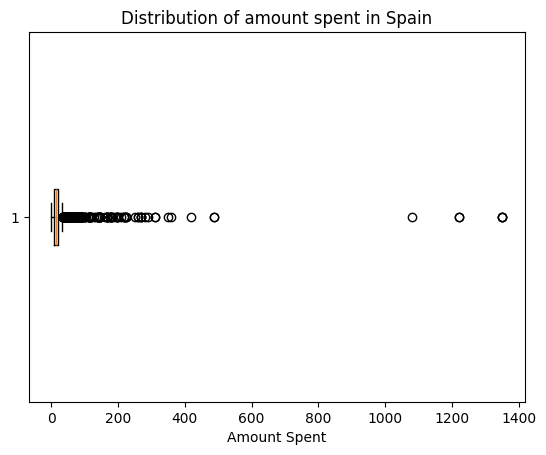

In [96]:
fq_spain = df_orders[df_orders['Country'] == 'Spain']
amount_spent = fq_spain['amount_spent']
plt.boxplot(amount_spent, vert=False)
plt.title('Distribution of amount spent in Spain')
plt.xlabel('Amount Spent')
plt.show()


#### Select all orders made in the month of August

In [97]:
df_orders_month = df_orders.query('month == 8')
df_orders_month

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [108]:
result2 = df_orders.query("month == 8")
result=pd.DataFrame(result2.Country.value_counts())
result


,count
Country,
United Kingdom,23105
Germany,795
EIRE,593
France,569
Netherlands,280
Switzerland,267
Spain,252
Belgium,194
Israel,171


#### What's the  average amount of money spent by country

In [115]:
average_spent_by_country = df_orders.groupby('Country')['amount_spent'].mean().reset_index()
average_spent_by_country

,Country,amount_spent
0,Australia,116.895620
1,Austria,25.624824
2,Bahrain,32.258824
3,Belgium,20.283772
4,Brazil,35.737500
5,Canada,24.280662
6,Channel Islands,27.340160
7,Cyprus,22.134169
8,Czech Republic,33.069600
9,Denmark,49.882474


#### What's the most expensive item?

In [118]:
most_expensive_item = df_orders['UnitPrice'].max()
most_expensive_item


8142.75

#### What was the average amount spent per year ?

In [119]:
avg_amount_yearly = df_orders.groupby('year')['amount_spent'].mean().reset_index()
avg_amount_yearly


,year,amount_spent
0,2010,21.892733
1,2011,22.430074
